In this notebook we will try to answer the following business questions:
#### How does the rates between the two cities compare? Can we spot patterns in the seasonal or weekly data?

In [345]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [346]:
# Loading data
s_calendar = pd.read_csv('calendar_seattle.csv')
#s_listings = pd.read_csv('listings_seattle.csv')
#s_reviews = pd.read_csv('reviews_seattle.csv')
b_calendar = pd.read_csv('calendar_boston.csv')
#b_listings = pd.read_csv('listings_boston.csv')
#b_reviews = pd.read_csv('reviews_boston.csv')

In [347]:
# Convert price string with $ to a float
def fix_price(x):
    if type(x)==str:
        x=x.replace('$','')
        x=x.replace(',','')
        x=float(x)
    return x

In [348]:
# Preprocessing
# Convert date string to datetime
# Use calendar of US holidays to check if a date falls on a public holiday

def calendar_preprocessing(cal):
    #df = cal.dropna(subset=['price'])
    df = cal.copy()
    df['price']=df['price'].apply(fix_price)
    df['available'] = df['available'].map(lambda s: False if s == "f" else True)
    df['date']=pd.to_datetime(df['date'])
    df['holiday'] = df['date'].dt.date.astype('datetime64').isin(holidays)
    df['weekday']=df.date.dt.dayofweek
    df['month']=df.date.dt.month
    df['day']=df.date.dt.day
    
    return df

In [349]:
df_seattle =  calendar_preprocessing(s_calendar);
df_boston = calendar_preprocessing(b_calendar)

Average price for Boston listings in the whole period: 201.17 USD
Average price for Seattle listings in the whole period: 137.90 USD


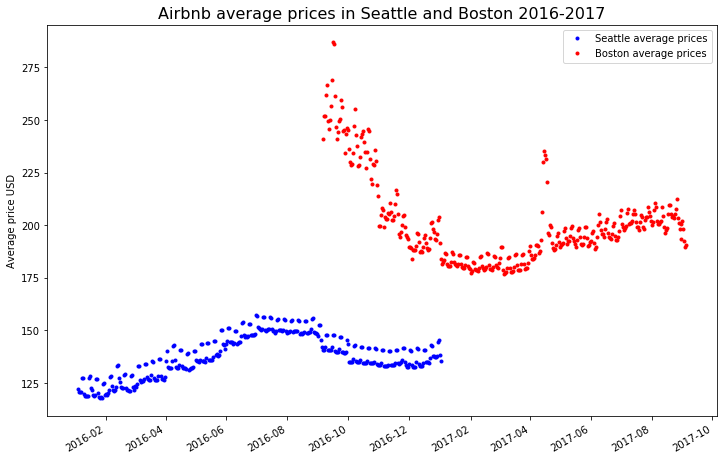

In [350]:
# Comparing average prices in Seattle and Boston over the whole period
# Aggregating the data per date
seattle_prices = df_seattle[df_seattle.available][['date', 'price']].groupby(df_seattle.date).price.mean()
boston_prices = df_boston[df_boston.available][['date', 'price']].groupby(df_boston.date).price.mean()
print("Average price for Boston listings in the whole period: {:.2f} USD".format(boston_prices.mean()))
print("Average price for Seattle listings in the whole period: {:.2f} USD".format(seattle_prices.mean()))
# Plotting
def getLabels(s,t):
    labels =[]
    for x in pd.date_range(start=s, end=t, freq='1M'):
        labels.append(x.strftime("%Y-%m-%d"))
    return labels

fig, axs = plt.subplots(1,1)
axs.plot_date(seattle_prices.index.values, seattle_prices.values, fmt='b.', label="Seattle average prices")
axs.plot_date(boston_prices.index.values, boston_prices.values, fmt='r.', label="Boston average prices")
axs.set_ylabel("Average price USD")
fig.set_size_inches(12,8)
#xlabels = pd.date_range(start=df_seattle.date.min(), end=df_boston.date.max(), freq='1M')
#print(pd.Series(xlabels).map(lambda x: x.strftime('%Y.%m')).values)
#axs.set_xticks(pd.Series(xlabels).map(lambda x: x.strftime('%Y.%m.%d')).values)
plt.title("Airbnb average prices in Seattle and Boston 2016-2017",fontsize=16)
handles, labels = axs.get_legend_handles_labels()
fig.autofmt_xdate()
axs.legend(handles, labels)
plt.show()

### How does the rates between the two cities compare? What trends/patterns can we spot?
Answer:
Boston is basically more expensive than Seattle, as the average price in Seattle is 137 dollars, while the average price in boston is 201 dollars.

Prices in both cities are rising from February to August and falling from September to February. Prices in Seattle are at least 30 usd more expensive per day in the busy July and August months. In Boston prices are lower than average from December to June and way above average in September and October.


date
0    135.676414
1    135.408764
2    135.447880
3    136.476032
4    143.036294
5    143.202136
6    136.459941
Name: price, dtype: float64
date
0    195.809561
1    195.173842
2    195.418228
3    198.073112
4    203.121167
5    203.408387
6    198.219764
Name: price, dtype: float64


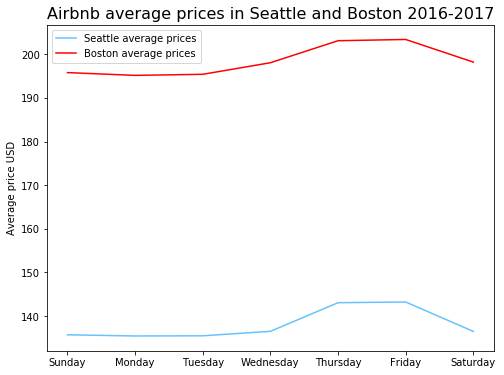

In [317]:
# Comparing prices in the week
seattle_prices = df_seattle[df_seattle.available][['date', 'price']].groupby(df_seattle.date.dt.dayofweek).price.mean()
boston_prices = df_boston[df_boston.available][['date', 'price']].groupby(df_boston.date.dt.dayofweek).price.mean()
print(seattle_prices)
print(boston_prices)
fig, axs = plt.subplots(1,1)
axs.plot(seattle_prices, color='#66c2ff', label="Seattle average prices")
axs.plot(boston_prices, color='red', label="Boston average prices")
#axs.plot(seattle_prices.values, fmt='b.', label="Seattle average prices")
#axs.plot(boston_prices.values, fmt='r.', label="Boston average prices")
axs.set_ylabel("Average price USD")
plt.xticks(np.arange(7), ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']);
fig.set_size_inches(8,6)
plt.title("Airbnb average prices in Seattle and Boston 2016-2017",fontsize=16)
handles, labels = axs.get_legend_handles_labels()
axs.legend(handles, labels)
plt.show()

### How do prices change during the week?
Answer:
Thursday and Friday are more expensive compared to the rest of the week in both cities: in Seattle prices are around 143 usd in those dsys compared to an average of 135 on Sun, Mon, Tue and 136 on Wed and Sat. In Boston prices are 203 usd on average on thursdays and fridays compared to an average of 195 on Sun, Mon, Tue and 198 on Wed and Sat.

So in the more expensive days in both cities prices are around 7-8 usd more than the less expensive ones.

In [374]:
#Let's have a look at prices during public holidays
from pandas.tseries.holiday import USFederalHolidayCalendar as uscalendar
import calendar
cal = uscalendar()
holidays = cal.holidays(df_seattle.date.min(), df_boston.date.max())

DatetimeIndex(['2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04',
               '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24',
               '2016-12-26', '2017-01-02', '2017-01-16', '2017-02-20',
               '2017-05-29', '2017-07-04', '2017-09-04'],
              dtype='datetime64[ns]', freq=None)

Seattle Holiday Prices
 date
2016-01-18    121.740475
2016-02-15    125.353895
2016-05-30    143.233837
2016-07-04    151.402362
2016-09-05    142.087264
2016-10-10    134.985660
2016-11-11    140.070272
2016-11-24    136.054989
2016-12-26    137.895797
2017-01-02    135.572767
Name: price, dtype: float64
Boston Holiday Prices
 date
2016-10-10    237.838101
2016-11-11    205.283324
2016-11-24    200.077407
2016-12-26    196.901139
2017-01-02    183.823384
2017-01-16    181.713867
2017-02-20    179.407662
2017-05-29    190.034305
2017-07-04    197.900737
2017-09-04    189.907829
Name: price, dtype: float64


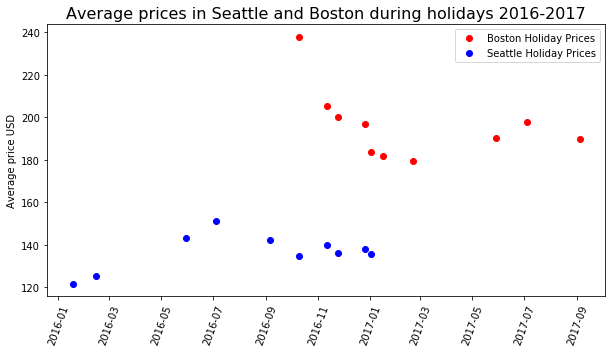

In [437]:
# Selecting datapoints that fall on holidays and computing average price for each day
bost_fest = df_boston[df_boston.available & (df_boston.date.isin(holidays))].groupby(df_boston.date).price.mean()
seat_fest = df_seattle[df_seattle.available & (df_seattle.date.isin(holidays))].groupby(df_seattle.date).price.mean()
print("Seattle Holiday Prices\n", seat_fest)
print("Boston Holiday Prices\n", bost_fest)

# Plotting
fig, axs = plt.subplots(1,1)
fig.set_size_inches(10,5)
plt.plot_date(bost_fest.index.values, bost_fest.values, fmt='o',label='Boston Holiday Prices', color='red')
plt.xticks(rotation=70)
plt.ylabel("Average price USD")
plt.plot_date(seat_fest.index.values, seat_fest.values, fmt='o',label='Seattle Holiday Prices', color='blue')
plt.xticks(rotation=70)
plt.title('Seattle Holiday Prices')
plt.title("Average prices in Seattle and Boston during holidays 2016-2017",fontsize=16)
handles, labels = axs.get_legend_handles_labels()
plt.legend(handles, labels)
#plt.ylim((100,300))
plt.show()



### Any anomaly during holidays?
The two plots show that Seattle prices are around the average price for the city with the exception of the 4th of July that is a bit above average (at 151.40 usd over an average of 137), and the January and February holidays where they are a bit below average. Similarly in Boston prices are below average in the January and February holidays, and around average for most of the other holidays except 10th of October (Columbus day) where prices spike to an average of 237 usd.